In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the file
df = pd.read_csv('meta_ccsd_energies.txt', sep='\s+', header=None, names=['filename', 'value'])

# Extract theta and phi using regex
pattern = r"theta_(.*?)_phi_(.*?)\.json"
df[['theta', 'phi']] = df['filename'].str.extract(pattern).astype(float)

# Drop the filename column, keep only numeric data
df = df[['theta', 'phi', 'value']]

print(df.head())


        theta         phi        value
0  156.521739  203.478261 -3007.791041
1   93.913043  281.739130 -3007.813326
2  172.173913   31.304348 -3007.830701
3  101.739130   31.304348 -3007.790243
4   15.652174   31.304348 -3007.800398


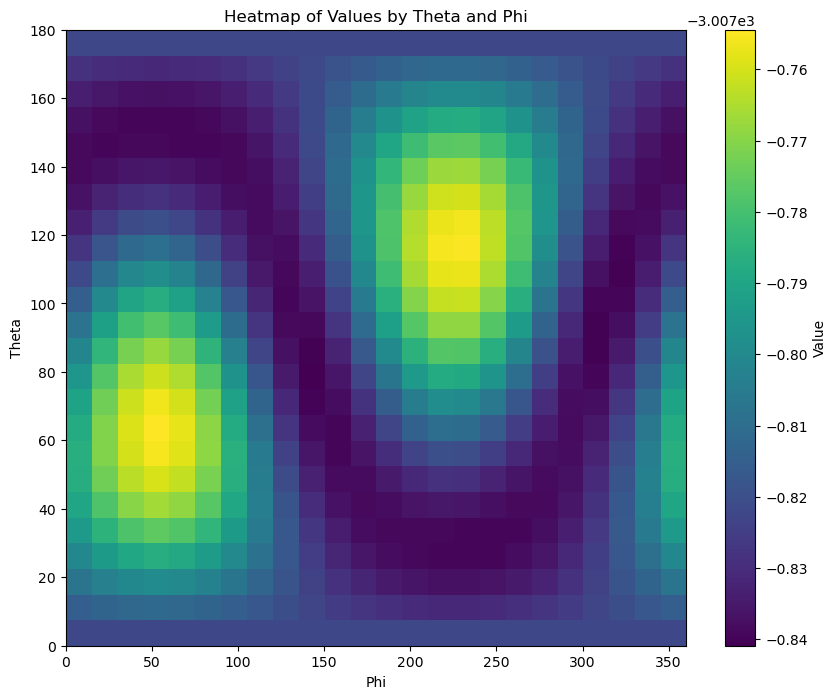

In [2]:
# Pivot to create a grid for heatmap
pivot_df = df.pivot_table(index='theta', columns='phi', values='value')

# Plot
plt.figure(figsize=(10, 8))
plt.imshow(pivot_df, aspect='auto', origin='lower',
           extent=[pivot_df.columns.min(), pivot_df.columns.max(),
                   pivot_df.index.min(), pivot_df.index.max()],
           cmap='viridis')
plt.colorbar(label='Value')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Heatmap of Values by Theta and Phi')
plt.show()

In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# ---- Read & parse file ----
data = []
with open('meta_ccsd_energies.txt', 'r') as f:
    for line in f:
        # Use regex to find theta, phi, and value
        m = re.search(r'theta_([-\d\.eE]+)_phi_([-\d\.eE]+)\.json', line)
        v = re.search(r'([-]?\d+\.\d+(?:[eE][-+]?\d+)?)\s*$', line.strip())
        if m and v:
            theta = float(m.group(1))
            phi = float(m.group(2))
            value = float(v.group(1))
            data.append((theta, phi, value))

df = pd.DataFrame(data, columns=['theta', 'phi', 'value'])
print(df.head(), f"\nParsed {len(df)} valid rows")


        theta         phi        value
0  156.521739  203.478261 -3007.791041
1   93.913043  281.739130 -3007.813326
2  172.173913   31.304348 -3007.830701
3  101.739130   31.304348 -3007.790243
4   15.652174   31.304348 -3007.800398 
Parsed 576 valid rows


In [4]:
# ---- Create a regular grid ----
theta_grid = np.linspace(df['theta'].min(), df['theta'].max(), 200)
phi_grid = np.linspace(df['phi'].min(), df['phi'].max(), 200)
THETA, PHI = np.meshgrid(theta_grid, phi_grid)

# ---- Interpolate the values ----
Z = griddata(
    points=(df['theta'], df['phi']),
    values=df['value'],
    xi=(THETA, PHI),
    method='cubic'  # 'linear', 'nearest', or 'cubic' for smoothing
)


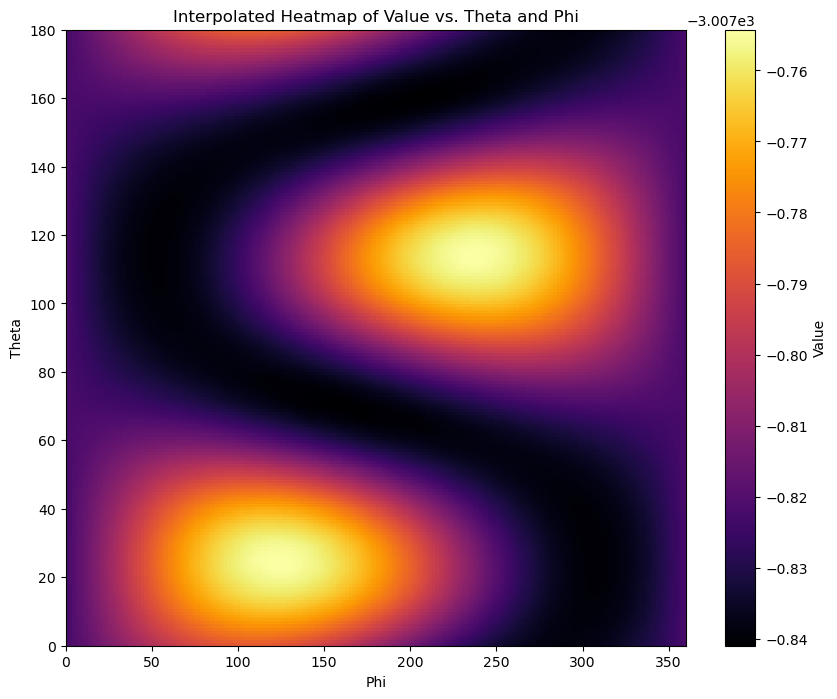

In [7]:
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(
    Z, extent=[phi_grid.min(), phi_grid.max(), theta_grid.min(), theta_grid.max()],
    origin='lower', aspect='auto', cmap='inferno'
)
plt.colorbar(heatmap, label='Value')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Interpolated Heatmap of Value vs. Theta and Phi')
plt.show()


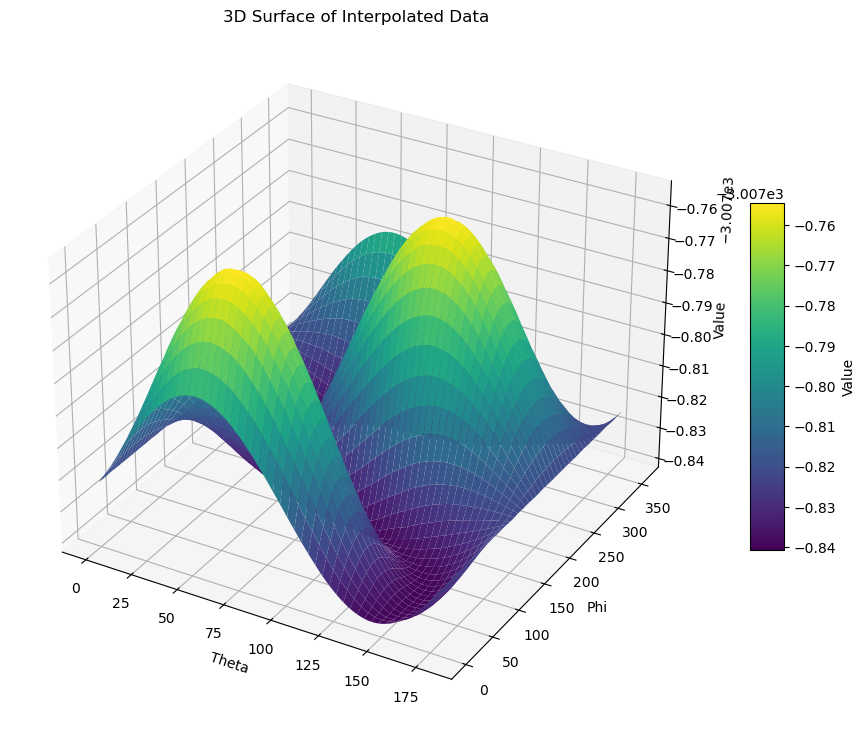

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(THETA, PHI, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Value')
ax.set_xlabel('Theta')
ax.set_ylabel('Phi')
ax.set_zlabel('Value')
ax.set_title('3D Surface of Interpolated Data')
plt.show()
